<a href="https://colab.research.google.com/github/SunkaraboinaPraveenKumar/Machine_Learning_Projects/blob/main/Question_Gen_Agent_Langgraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -qU langchain-groq langgraph langchain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.6/411.6 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.9 MB/s eta 0:00:00


In [7]:
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display
from typing import TypedDict, List, Annotated
import operator
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_groq import ChatGroq

In [4]:
import getpass
import os

if "GROQ_API_KEY" not in os.environ:
  os.environ["GROQ_API_KEY"] = getpass.getpass("Groq API API Key:")

llm = ChatGroq(
    model="mixtral-8x7b-32768",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2
)

Groq API API Key:··········


In [8]:
class State(TypedDict):
  messages: Annotated[List[str],operator.add]

In [9]:
def content_generate(state):
  messages=state['messages']
  response = llm.invoke(messages)
  return {"messages":[response]}

In [10]:
def generate_ques(state):
  messages=state["messages"][-1]
  content=messages.content
  prompt_template="Generate two questions on {content}".format(content=content)
  response=llm.invoke(prompt_template)
  return {"messages":[response]}

In [11]:
builder = StateGraph(State)

In [12]:
builder.add_node("llm",content_generate)
builder.add_node("create_quest",generate_ques)

In [13]:
builder.set_entry_point("llm")

In [14]:
builder.add_edge("llm","create_quest")
builder.add_edge("create_quest",END)

In [15]:
graph = builder.compile()

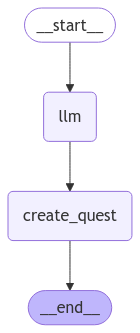

In [16]:
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  print("Visualization requires additional dependencies")

In [17]:
query = "Generate content regarding Hyderabad. The content should be of 50 words"
input_msg={"messages":[query]}

In [18]:
result = graph.invoke(input_msg)

In [20]:
result['messages']

['Generate content regarding Hyderabad. The content should be of 50 words',
 AIMessage(content="Hyderabad, the pearl city of India, is known for its rich history, culture, and technology. Famous for its mouth-watering biryani, the city is home to the stunning Charminar monument and the beautiful Hussain Sagar Lake. Hyderabad is also a major IT hub, with many multinational companies having their operations in the city. The city's blend of traditional and modern elements makes it a must-visit destination in India.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 102, 'prompt_tokens': 24, 'total_tokens': 126, 'completion_time': 0.161219907, 'prompt_time': 0.002537532, 'queue_time': 0.030849963000000005, 'total_time': 0.163757439}, 'model_name': 'mixtral-8x7b-32768', 'system_fingerprint': 'fp_c5f20b5bb1', 'finish_reason': 'stop', 'logprobs': None}, id='run-00d533e9-1fc5-4fb1-b906-0dff5c27faa3-0', usage_metadata={'input_tokens': 24, 'output_tokens': 102, 'tota

In [21]:
result['messages'][2].content

"1. How does Hyderabad's rich history and culture blend with its modern technology hub status, making it a unique destination in India?\n2. Can you describe the significance of the Charminar monument and Hussain Sagar Lake in Hyderabad's history, and how they contribute to the city's tourism appeal?"